Saúl Arias Durán.

# Práctica ANN-0

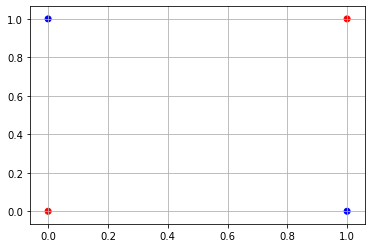

In [16]:
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([0,1,1,0])

pp.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'red' for i in d])

pp.grid(True)
pp.show()

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /Users/saulariasduran/anaconda3/envs/ia2/lib/python3.7/site-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


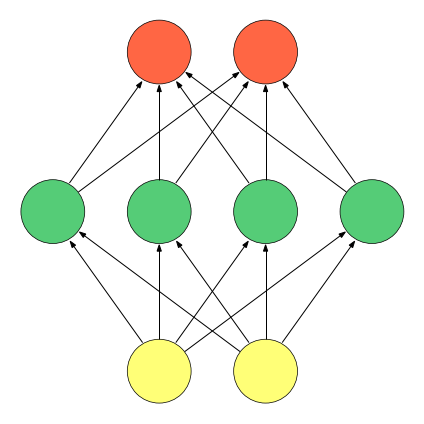

In [17]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 2


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])

real_bp()





In [23]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, 2))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(x,d)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)
Pesos W^(0): 
: [[ 1.07455069e-04 -6.99595470e-03  4.49466701e+00 -4.49920490e+00]
 [-6.05380126e-03 -1.75831840e-02 -4.49568519e+00  4.49708864e+00]]

Pesos W^(1): 
: [[ 0.02310692 -0.00831938]
 [ 0.02190508 -0.00821977]
 [-5.25733683  5.25990804]
 [-5.25753898  5.25993404]]

Prueba con { 0|0 } =>  [0]

Prueba con { 0|1 } =>  [1]

Prueba con { 1|0 } =>  [1]

Prueba con { 1|1 } =>  [0]


# Práctica ANN-1

Genere 1000 puntos aleatorios con coordenadas (x1,x2). Con estos puntos, deberá realizar las siguientes tareas:
* Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
* Entrenar la red hasta lograr un error mínimo.
* Probar la red y presentar la matriz de confusión.
* Indicar el nivel de precisión (muestras correctamente clasificadas frente al total de muestras):
